#### Import Data
Data is imported from the train.csv.gz file in the data folder. This data was downloaded from the Kaggle.com
* Load dataframe using Pandas
* Create categorical target with 10 categories [0-9]
* Normalize and format our training data

In [1]:
import keras
import numpy as np
import pandas as pd
from keras import backend as K

df = pd.read_csv("data/train.csv.gz")
y = keras.utils.to_categorical(df[df.columns[0]], 10)
X = np.array(df[df.columns[1:]], dtype=float) / 255

train_size = int(X.shape[0] * .75)

if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    X = X.reshape(X.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

Using TensorFlow backend.


#### Network Setup
* Convolutional layer with 64 4x4 filters
* Dropout of 25% between conv layers
* Second Convolutional layer with 128 4x4 filters
* Max Pooling layer
* Flatten layer
* Fully connected layer with 512 neurons
* 50 percent dropout layer
* 10 neurons representing our output layer using a softmax activation function

In [2]:
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import RMSprop

model = Sequential()
model.add(Conv2D(64, kernel_size=(4, 4), activation='relu', input_shape=input_shape))
model.add(Dropout(0.25))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#### Training
* Loss is calculated as categorical cross entropy 
* RMS Prop is used for optimization of the network 

In [3]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))
        
history = LossHistory()
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
model.fit(X[:train_size], y[:train_size], batch_size=100, epochs=2, verbose=False,
         callbacks=[history])

#### Optimization
Plot the loss after each training batch

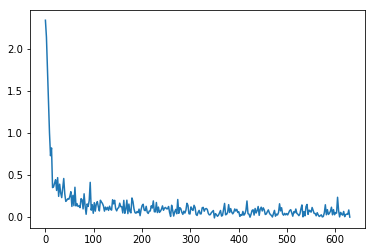

In [4]:
from scipy.interpolate import spline
import matplotlib.pyplot as plt

plot_x = np.array(range(0, len(history.losses)))
plot_sx = np.linspace(0, len(history.losses), 300)
plot_y = spline(plot_x, history.losses, plot_sx)
plt.plot(plot_sx, plot_y)
plt.show()

In [5]:
from sklearn import metrics

predicted = np.argmax(model.predict(X[train_size:]), axis=1)
actual = np.argmax(y[train_size:], axis=1)
print(metrics.classification_report(actual, predicted))
print(metrics.confusion_matrix(actual, predicted))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      1063
          1       0.98      1.00      0.99      1182
          2       0.98      0.99      0.99      1005
          3       1.00      0.98      0.99      1108
          4       0.98      0.99      0.98       985
          5       0.99      0.98      0.99       940
          6       0.99      0.99      0.99      1042
          7       0.98      0.99      0.98      1111
          8       0.99      0.98      0.99      1021
          9       0.99      0.96      0.97      1043

avg / total       0.99      0.99      0.99     10500

[[1055    1    0    0    0    0    6    0    1    0]
 [   0 1177    1    0    0    1    1    1    1    0]
 [   1    0  994    1    0    0    0    7    1    1]
 [   1    4    5 1087    0    3    1    6    0    1]
 [   0    7    0    0  976    0    0    0    0    2]
 [   2    1    0    4    2  924    3    0    2    2]
 [   1    2    1    0    2    1 1035    0  